In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,chi2_contingency,chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
coco_df = pd.read_csv('C:/Users/prana/Desktop/DataIku Hackathon/data.csv')
coco_df.head()

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,Yes,No,No,No,3.0
1,2,U.S.A.,Dominican Republic,76.0,3.50,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
2,3,U.S.A.,Madagascar,76.0,3.75,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
3,4,U.S.A.,Other,68.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
4,5,U.S.A.,Other,80.0,3.25,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0


# Data Preprocessing & Analysis

In [3]:
coco_df.count()

id                         2130
company_location           2130
country_of_bean_origin     2130
cocoa_percent              2130
rating                     2130
sweet                      2130
nutty                      2130
cocoa                      2130
roasty                     2130
earthy                     2130
creamy                     2130
sandy                      2130
fatty                      2130
floral                     2130
intense                    2130
spicy                      2130
sour                       2130
vanilla                    2130
fruit                      2130
molasses                   2130
woody                      2130
sticky                     2130
coffee                     2130
rich                       2130
dried.fruit                2130
ingredient_Beans           2130
ingredient_Sugar           2130
ingredient_Sweetener       2130
ingredient_Cocoa_Butter    2130
ingredient_vanilla         2130
ingredient_lecithin        2130
ingredie

In [4]:
coco_df.shape

(2130, 33)

In [5]:
coco_df.isnull().sum()    # most of the data is clean but there are 70 null values in "number_of_ingredients"      

id                          0
company_location            0
country_of_bean_origin      0
cocoa_percent               0
rating                      0
sweet                       0
nutty                       0
cocoa                       0
roasty                      0
earthy                      0
creamy                      0
sandy                       0
fatty                       0
floral                      0
intense                     0
spicy                       0
sour                        0
vanilla                     0
fruit                       0
molasses                    0
woody                       0
sticky                      0
coffee                      0
rich                        0
dried.fruit                 0
ingredient_Beans            0
ingredient_Sugar            0
ingredient_Sweetener        0
ingredient_Cocoa_Butter     0
ingredient_vanilla          0
ingredient_lecithin         0
ingredient_salt             0
number_of_ingredients      70
dtype: int

In [6]:
coco_df1 = coco_df.fillna(0)

In [7]:
coco_df1.isnull().sum() 

id                         0
company_location           0
country_of_bean_origin     0
cocoa_percent              0
rating                     0
sweet                      0
nutty                      0
cocoa                      0
roasty                     0
earthy                     0
creamy                     0
sandy                      0
fatty                      0
floral                     0
intense                    0
spicy                      0
sour                       0
vanilla                    0
fruit                      0
molasses                   0
woody                      0
sticky                     0
coffee                     0
rich                       0
dried.fruit                0
ingredient_Beans           0
ingredient_Sugar           0
ingredient_Sweetener       0
ingredient_Cocoa_Butter    0
ingredient_vanilla         0
ingredient_lecithin        0
ingredient_salt            0
number_of_ingredients      0
dtype: int64

In [8]:
coco_cdf = coco_df1.copy()

In [9]:
coco_cdf.dtypes

id                           int64
company_location            object
country_of_bean_origin      object
cocoa_percent              float64
rating                     float64
sweet                       object
nutty                       object
cocoa                       object
roasty                      object
earthy                      object
creamy                      object
sandy                       object
fatty                       object
floral                      object
intense                     object
spicy                       object
sour                        object
vanilla                     object
fruit                       object
molasses                    object
woody                       object
sticky                      object
coffee                      object
rich                        object
dried.fruit                 object
ingredient_Beans            object
ingredient_Sugar            object
ingredient_Sweetener        object
ingredient_Cocoa_But

In [10]:
coco_cdf.count()

id                         2130
company_location           2130
country_of_bean_origin     2130
cocoa_percent              2130
rating                     2130
sweet                      2130
nutty                      2130
cocoa                      2130
roasty                     2130
earthy                     2130
creamy                     2130
sandy                      2130
fatty                      2130
floral                     2130
intense                    2130
spicy                      2130
sour                       2130
vanilla                    2130
fruit                      2130
molasses                   2130
woody                      2130
sticky                     2130
coffee                     2130
rich                       2130
dried.fruit                2130
ingredient_Beans           2130
ingredient_Sugar           2130
ingredient_Sweetener       2130
ingredient_Cocoa_Butter    2130
ingredient_vanilla         2130
ingredient_lecithin        2130
ingredie

In [11]:
coco_cdf['number_of_ingredients'] = coco_cdf['number_of_ingredients'].astype(int)

In [12]:
coco_cdf['number_of_ingredients'].dtypes

dtype('int32')

In [13]:
coco_cdf['number_of_ingredients'] = coco_cdf['number_of_ingredients'] + 1

In [14]:
coco_cdf.head()

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,Yes,No,No,No,4
1,2,U.S.A.,Dominican Republic,76.0,3.50,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
2,3,U.S.A.,Madagascar,76.0,3.75,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
3,4,U.S.A.,Other,68.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
4,5,U.S.A.,Other,80.0,3.25,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4


In [15]:
cf = coco_cdf.groupby(['number_of_ingredients'])
cf.get_group(3)

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
29,30,U.S.A.,Peru,70.0,3.75,No,No,No,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
30,31,U.S.A.,Peru,70.0,3.75,No,Yes,Yes,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
31,32,U.S.A.,Mexico,74.0,3.25,No,No,No,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
32,33,U.S.A.,Peru,70.0,3.50,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,No,No,No,No,3
37,38,Other,Other,70.0,2.75,Yes,No,Yes,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2088,U.S.A.,Tanzania,73.0,3.25,No,No,No,No,Yes,...,No,No,Yes,Yes,Yes,No,No,No,No,3
2088,2089,U.S.A.,Nicaragua,72.0,3.50,No,No,No,Yes,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
2089,2090,U.S.A.,Dominican Republic,70.0,2.50,No,No,No,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
2090,2091,U.S.A.,Madagascar,70.0,2.75,Yes,No,No,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3


In [16]:
cf = coco_cdf.groupby(['number_of_ingredients','company_location'])
pd.DataFrame(cf['number_of_ingredients'].first())

number_of_ingredients
number_of_ingredients company_location                       
1                     Australia                             1
                      Belgium                               1
                      Canada                                1
                      Ecuador                               1
                      France                                1
                      Italy                                 1
                      Other                                 1
                      U.K.                                  1
                      U.S.A.                                1
2                     Canada                                2
                      Italy                                 2
                      U.S.A.                                2
3                     Australia                             3
                      Canada                                3
                      Ecuador                               3
                      France                                3
                      Italy                                 3
                      Other                                 3
                      U.K.                                  3
                      U.S.A.                                3
4                     Australia                             4
                      Belgium                               4
                      Canada                                4
                      Ecuador                               4
                      France                                4
                      Italy                                 4
                      Other                                 4
                      U.K.                                  4
                      U.S.A.                                4
5                     Australia                             5
                      Belgium                               5
                      Canada                                5
                      Ecuador                               5
                      France                                5
                      Italy                                 5
                      Other                                 5
                      U.K.                                  5
                      U.S.A.                                5
6                     Australia                             6
                      Belgium                               6
                      Canada                                6
                      France                                6
                      Italy                                 6
                      Other                                 6
                      U.K.                                  6
                      U.S.A.                                6
7                     France                                7
                      Other                                 7

# Chi Square Test:

In [17]:
cat = ['company_location','country_of_bean_origin','sweet','nutty','cocoa','roasty','earthy','creamy','sandy','fatty','floral','intense','spicy','sour','vanilla','fruit','molasses','woody','sticky','coffee','rich','dried.fruit','ingredient_Beans','ingredient_Sugar','ingredient_Sweetener','ingredient_Cocoa_Butter','ingredient_vanilla','ingredient_lecithin','ingredient_salt']

In [18]:
cat_dep=[]
cat_indep = []
for name in cat:
    crt=pd.crosstab(coco_cdf['rating'],coco_cdf[name])
    stat, p, dof, expected = chi2_contingency(crt)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        cat_dep.append('{} : Dependent'.format(name))
    else:
        cat_dep.append('{} : Independent'.format(name))
        cat_indep.append(name)
cat_dep

['company_location : Dependent',
 'country_of_bean_origin : Dependent',
 'sweet : Dependent',
 'nutty : Dependent',
 'cocoa : Dependent',
 'roasty : Independent',
 'earthy : Dependent',
 'creamy : Dependent',
 'sandy : Dependent',
 'fatty : Dependent',
 'floral : Independent',
 'intense : Independent',
 'spicy : Independent',
 'sour : Dependent',
 'vanilla : Dependent',
 'fruit : Dependent',
 'molasses : Dependent',
 'woody : Independent',
 'sticky : Independent',
 'coffee : Independent',
 'rich : Dependent',
 'dried.fruit : Dependent',
 'ingredient_Beans : Dependent',
 'ingredient_Sugar : Dependent',
 'ingredient_Sweetener : Independent',
 'ingredient_Cocoa_Butter : Independent',
 'ingredient_vanilla : Dependent',
 'ingredient_lecithin : Dependent',
 'ingredient_salt : Independent']

In [19]:
cat_indep

['roasty',
 'floral',
 'intense',
 'spicy',
 'woody',
 'sticky',
 'coffee',
 'ingredient_Sweetener',
 'ingredient_Cocoa_Butter',
 'ingredient_salt']

In [20]:
# coco_cdf.drop(['roasty',
#  'floral',
#  'intense',
#  'spicy',
#  'woody',
#  'sticky',
#  'coffee',
#  'ingredient_Sweetener',
#  'ingredient_Cocoa_Butter',
#  'ingredient_salt'], axis = 1, inplace=True)

In [21]:
# coco_cdf

# EDA

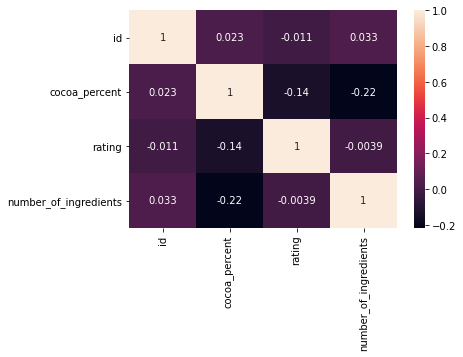

In [22]:
corr = coco_cdf.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.rcParams["figure.figsize"]=(2,1)
plt.show()


In [23]:
columns_list = coco_df1.columns

In [24]:
ingredients_list = columns_list[25:-1]

In [25]:
ingredients_list

Index(['ingredient_Beans', 'ingredient_Sugar', 'ingredient_Sweetener',
       'ingredient_Cocoa_Butter', 'ingredient_vanilla', 'ingredient_lecithin',
       'ingredient_salt'],
      dtype='object')

In [26]:
# sns.countplot(data=coco_df1, x='ingredient_Beans').set(title='Beans Count')

# sns.set(rc = {'figure.figsize':(10,10)})

[Text(0.5, 1.0, 'Salt Count')]

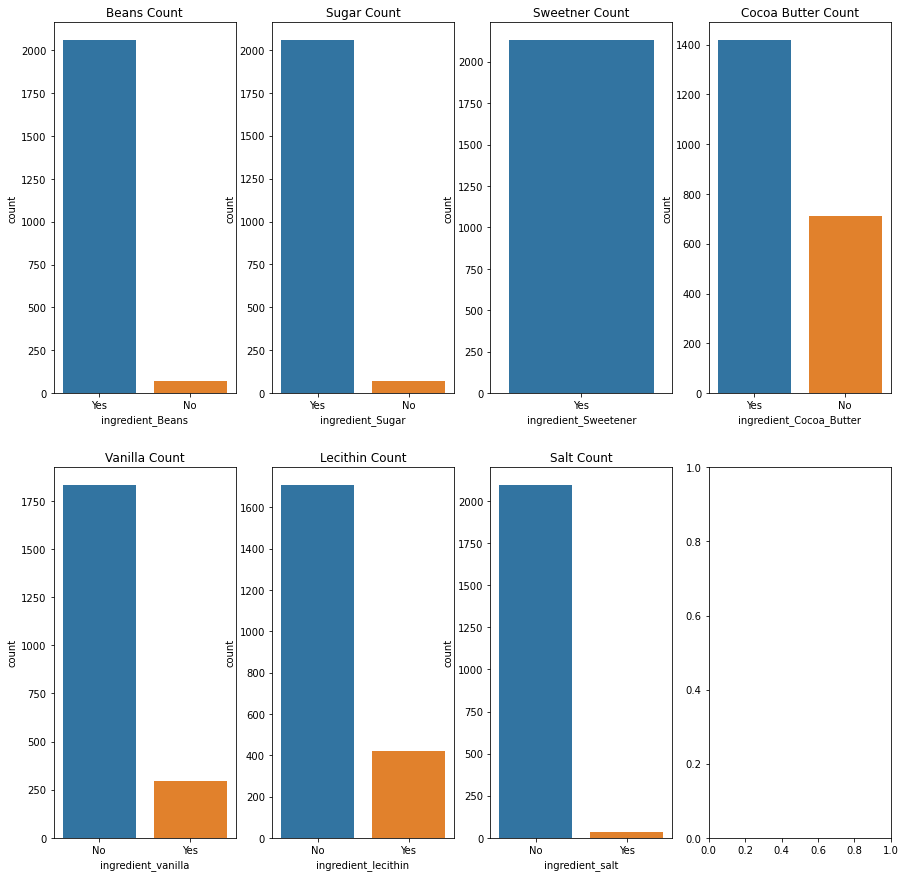

In [27]:
fig,axis = plt.subplots(2,4, figsize=(15,15))

sns.countplot(data=coco_df1, x=ingredients_list[0], ax=axis[0,0]).set(title='Beans Count')
sns.countplot(data=coco_df1, x=ingredients_list[1], ax=axis[0,1]).set(title='Sugar Count')
sns.countplot(data=coco_df1, x=ingredients_list[2], ax=axis[0,2]).set(title='Sweetner Count')
sns.countplot(data=coco_df1, x=ingredients_list[3], ax=axis[0,3]).set(title='Cocoa Butter Count')
sns.countplot(data=coco_df1, x=ingredients_list[4], ax=axis[1,0]).set(title='Vanilla Count')
sns.countplot(data=coco_df1, x=ingredients_list[5], ax=axis[1,1]).set(title='Lecithin Count')
sns.countplot(data=coco_df1, x=ingredients_list[6], ax=axis[1,2]).set(title='Salt Count')


In [28]:
characteristics_list = columns_list[5:25]

In [29]:
characteristics_list

Index(['sweet', 'nutty', 'cocoa', 'roasty', 'earthy', 'creamy', 'sandy',
       'fatty', 'floral', 'intense', 'spicy', 'sour', 'vanilla', 'fruit',
       'molasses', 'woody', 'sticky', 'coffee', 'rich', 'dried.fruit'],
      dtype='object')

[Text(0.5, 1.0, 'dried.fruit Count')]

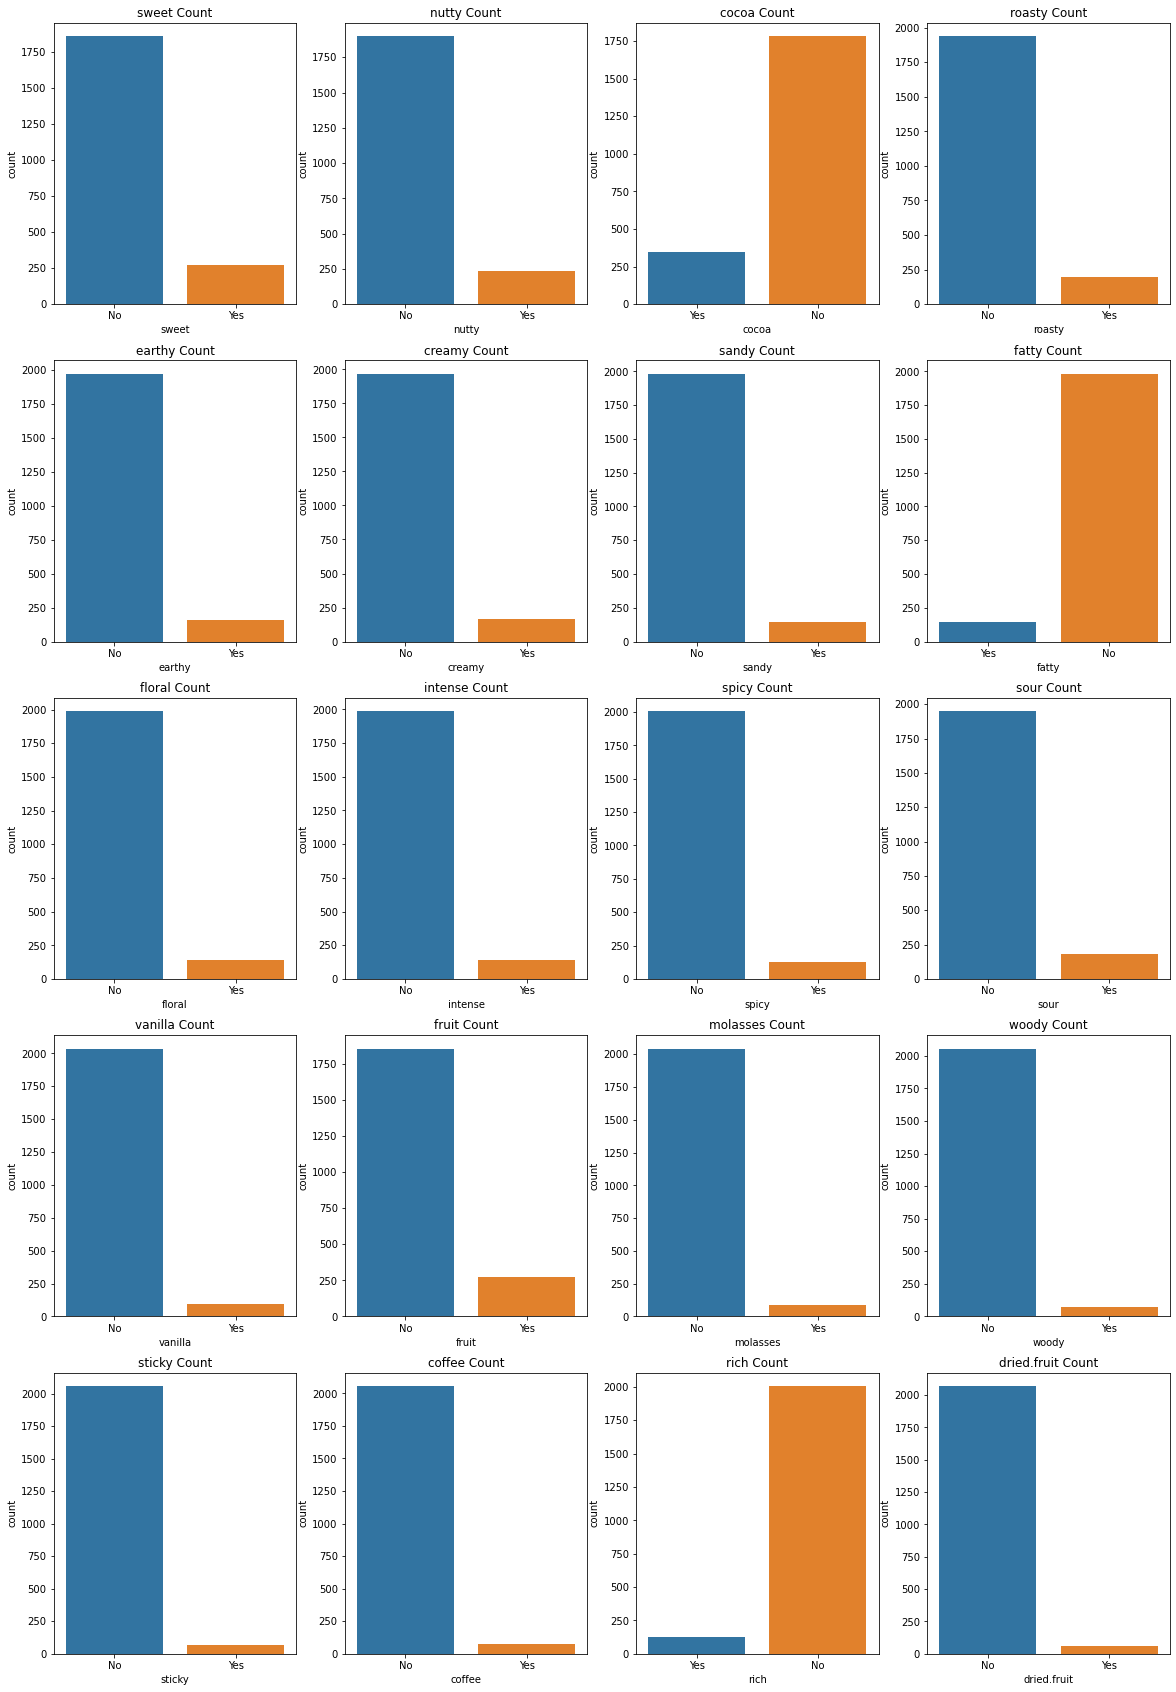

In [30]:
fig,axis = plt.subplots(5,4, figsize=(20,30))

sns.countplot(data=coco_df1, x=characteristics_list[0], ax=axis[0,0]).set(title='{} Count'.format(characteristics_list[0]))
sns.countplot(data=coco_df1, x=characteristics_list[1], ax=axis[0,1]).set(title='{} Count'.format(characteristics_list[1]))
sns.countplot(data=coco_df1, x=characteristics_list[2], ax=axis[0,2]).set(title='{} Count'.format(characteristics_list[2]))
sns.countplot(data=coco_df1, x=characteristics_list[3], ax=axis[0,3]).set(title='{} Count'.format(characteristics_list[3]))

sns.countplot(data=coco_df1, x=characteristics_list[4], ax=axis[1,0]).set(title='{} Count'.format(characteristics_list[4]))
sns.countplot(data=coco_df1, x=characteristics_list[5], ax=axis[1,1]).set(title='{} Count'.format(characteristics_list[5]))
sns.countplot(data=coco_df1, x=characteristics_list[6], ax=axis[1,2]).set(title='{} Count'.format(characteristics_list[6]))
sns.countplot(data=coco_df1, x=characteristics_list[7], ax=axis[1,3]).set(title='{} Count'.format(characteristics_list[7]))

sns.countplot(data=coco_df1, x=characteristics_list[8], ax=axis[2,0]).set(title='{} Count'.format(characteristics_list[8]))
sns.countplot(data=coco_df1, x=characteristics_list[9], ax=axis[2,1]).set(title='{} Count'.format(characteristics_list[9]))
sns.countplot(data=coco_df1, x=characteristics_list[10], ax=axis[2,2]).set(title='{} Count'.format(characteristics_list[10]))
sns.countplot(data=coco_df1, x=characteristics_list[11], ax=axis[2,3]).set(title='{} Count'.format(characteristics_list[11]))

sns.countplot(data=coco_df1, x=characteristics_list[12], ax=axis[3,0]).set(title='{} Count'.format(characteristics_list[12]))
sns.countplot(data=coco_df1, x=characteristics_list[13], ax=axis[3,1]).set(title='{} Count'.format(characteristics_list[13]))
sns.countplot(data=coco_df1, x=characteristics_list[14], ax=axis[3,2]).set(title='{} Count'.format(characteristics_list[14]))
sns.countplot(data=coco_df1, x=characteristics_list[15], ax=axis[3,3]).set(title='{} Count'.format(characteristics_list[15]))

sns.countplot(data=coco_df1, x=characteristics_list[16], ax=axis[4,0]).set(title='{} Count'.format(characteristics_list[16]))
sns.countplot(data=coco_df1, x=characteristics_list[17], ax=axis[4,1]).set(title='{} Count'.format(characteristics_list[17]))
sns.countplot(data=coco_df1, x=characteristics_list[18], ax=axis[4,2]).set(title='{} Count'.format(characteristics_list[18]))
sns.countplot(data=coco_df1, x=characteristics_list[19], ax=axis[4,3]).set(title='{} Count'.format(characteristics_list[19]))


In [31]:
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()
        y = p.get_height() + gap_label_bar
        plt.xticks(rotation = 90)
    ax.margins(y=0.1)

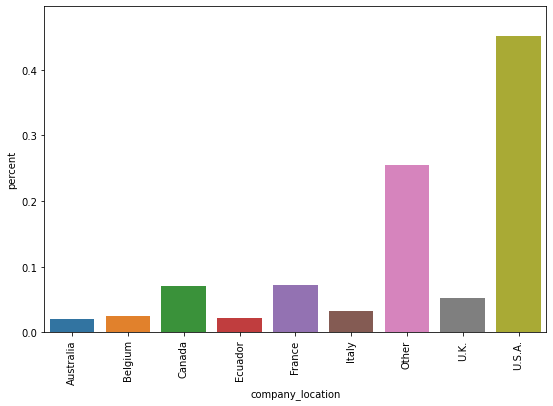

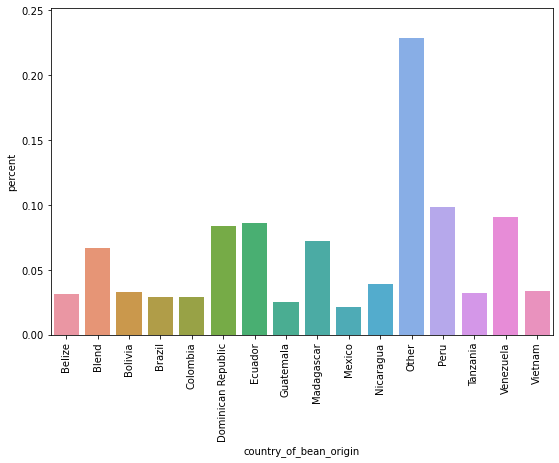

In [32]:
for attr in ['company_location',	'country_of_bean_origin']:
    plot_bar_chart_with_percent_label(df=coco_df1, target_variable=attr)

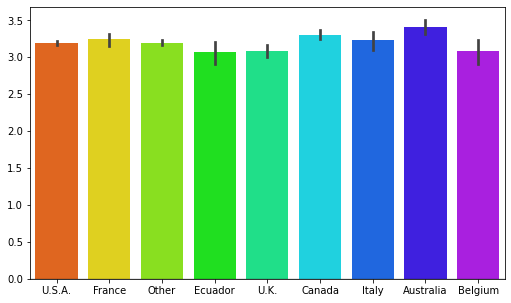

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
Australia,42.0,3.410714,0.361321,2.50,3.25,3.50,3.750,4.0
Belgium,53.0,3.089623,0.626142,1.00,3.00,3.00,3.500,4.0
Canada,151.0,3.306291,0.405352,2.00,3.00,3.25,3.625,4.0
Ecuador,46.0,3.065217,0.520242,1.50,2.75,3.00,3.500,4.0
France,153.0,3.241830,0.529879,1.50,3.00,3.25,3.500,4.0
Italy,68.0,3.238971,0.491407,1.50,3.00,3.25,3.500,4.0
Other,542.0,3.196033,0.416523,1.00,3.00,3.25,3.500,4.0
U.K.,113.0,3.081858,0.463443,1.75,2.75,3.00,3.500,4.0
U.S.A.,962.0,3.191528,0.426458,1.50,3.00,3.25,3.500,4.0


In [33]:
# Create barplot
plt.figure(figsize=(8.5,5))
company_graph = sns.barplot(x = 'company_location', y = 'rating', data = coco_df1, 
                          palette = 'gist_rainbow', linewidth = 2.3)


# Bolding horizontal line at y = 0
company_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
company_graph.xaxis.label.set_visible(False)
company_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
coco_df1.groupby('company_location')['rating'].describe()

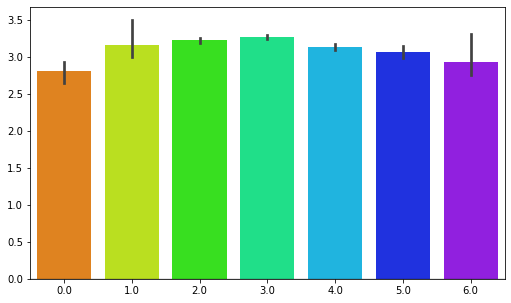

,count,mean,std,min,25%,50%,75%,max
number_of_ingredients,,,,,,,,
0.0,70.0,2.803571,0.668782,1.00,2.50,3.00,3.2500,4.0
1.0,3.0,3.166667,0.288675,3.00,3.00,3.00,3.2500,3.5
2.0,622.0,3.225080,0.408226,2.00,3.00,3.25,3.5000,4.0
3.0,868.0,3.267281,0.398224,1.50,3.00,3.25,3.5000,4.0
4.0,401.0,3.137157,0.446392,1.50,2.75,3.00,3.5000,4.0
5.0,162.0,3.066358,0.551532,1.00,2.75,3.00,3.5000,4.0
6.0,4.0,2.937500,0.375000,2.75,2.75,2.75,2.9375,3.5


In [34]:
plt.figure(figsize=(8.5,5))
company_graph = sns.barplot(x = 'number_of_ingredients', y = 'rating', data = coco_df1, 
                          palette = 'gist_rainbow', linewidth = 2.3)


# Bolding horizontal line at y = 0
company_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
company_graph.xaxis.label.set_visible(False)
company_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
coco_df1.groupby('number_of_ingredients')['rating'].describe()

In [35]:
# col_list = coco_cdf.columns
# # col_list = col_list[5:32]
# for col_name in col_list:
#     coco_cdf[col_name] = coco_cdf[col_name].map({"Yes": 1, "No": 0})

In [36]:
# coco_cdf

In [37]:
# x = coco_cdf.drop(labels = ['id','rating','company_location','country_of_bean_origin'], axis = 1)

In [38]:
# x

# Label Encoder

In [39]:
le_sweet = LabelEncoder()
coco_cdf['sweet'] = le_sweet.fit_transform(coco_cdf['sweet'])
le_sweet.classes_

le_nutty = LabelEncoder()
coco_cdf['nutty'] = le_nutty.fit_transform(coco_cdf['nutty'])
le_nutty.classes_

le_cocoa = LabelEncoder()
coco_cdf['cocoa'] = le_cocoa.fit_transform(coco_cdf['cocoa'])
le_cocoa.classes_

le_roasty = LabelEncoder()
coco_cdf['roasty'] = le_roasty.fit_transform(coco_cdf['roasty'])
le_roasty.classes_

le_earthy = LabelEncoder()
coco_cdf['earthy'] = le_earthy.fit_transform(coco_cdf['earthy'])
le_earthy.classes_

creamy = LabelEncoder()
coco_cdf['creamy'] = creamy.fit_transform(coco_cdf['creamy'])
creamy.classes_

sandy = LabelEncoder()
coco_cdf['sandy'] = sandy.fit_transform(coco_cdf['sandy'])
sandy.classes_

fatty = LabelEncoder()
coco_cdf['fatty'] = fatty.fit_transform(coco_cdf['fatty'])
fatty.classes_

floral = LabelEncoder()
coco_cdf['floral'] = floral.fit_transform(coco_cdf['floral'])
floral.classes_

intense = LabelEncoder()
coco_cdf['intense'] = intense.fit_transform(coco_cdf['intense'])
intense.classes_

spicy = LabelEncoder()
coco_cdf['spicy'] = spicy.fit_transform(coco_cdf['spicy'])
spicy.classes_

sour = LabelEncoder()
coco_cdf['sour'] = sour.fit_transform(coco_cdf['sour'])
sour.classes_

vanilla = LabelEncoder()
coco_cdf['vanilla'] = vanilla.fit_transform(coco_cdf['vanilla'])
vanilla.classes_

fruit = LabelEncoder()
coco_cdf['fruit'] = fruit.fit_transform(coco_cdf['fruit'])
fruit.classes_

molasses = LabelEncoder()
coco_cdf['molasses'] = molasses.fit_transform(coco_cdf['molasses'])
molasses.classes_

woody = LabelEncoder()
coco_cdf['woody'] = woody.fit_transform(coco_cdf['woody'])
woody.classes_

sticky = LabelEncoder()
coco_cdf['sticky'] = sticky.fit_transform(coco_cdf['sticky'])
sticky.classes_

coffee = LabelEncoder()
coco_cdf['coffee'] = coffee.fit_transform(coco_cdf['coffee'])
coffee.classes_

rich = LabelEncoder()
coco_cdf['rich'] = rich.fit_transform(coco_cdf['rich'])
rich.classes_

dryfruit = LabelEncoder()
coco_cdf['dried.fruit'] = dryfruit.fit_transform(coco_cdf['dried.fruit'])
dryfruit.classes_

ingredient_Beans = LabelEncoder()
coco_cdf['ingredient_Beans'] = ingredient_Beans.fit_transform(coco_cdf['ingredient_Beans'])
ingredient_Beans.classes_

ingredient_Sugar = LabelEncoder()
coco_cdf['ingredient_Sugar'] = ingredient_Sugar.fit_transform(coco_cdf['ingredient_Sugar'])
ingredient_Sugar.classes_

ingredient_Cocoa_Butter = LabelEncoder()
coco_cdf['ingredient_Cocoa_Butter'] = ingredient_Cocoa_Butter.fit_transform(coco_cdf['ingredient_Cocoa_Butter'])
ingredient_Cocoa_Butter.classes_

ingredient_vanilla = LabelEncoder()
coco_cdf['ingredient_vanilla'] = ingredient_vanilla.fit_transform(coco_cdf['ingredient_vanilla'])
ingredient_vanilla.classes_

ingredient_lecithin = LabelEncoder()
coco_cdf['ingredient_lecithin'] = ingredient_lecithin.fit_transform(coco_cdf['ingredient_lecithin'])
ingredient_lecithin.classes_

ingredient_salt = LabelEncoder()
coco_cdf['ingredient_salt'] = ingredient_salt.fit_transform(coco_cdf['ingredient_salt'])
ingredient_salt.classes_

coco_cdf['ingredient_Sweetener'] = coco_cdf['ingredient_Sweetener'].map({"Yes": 1})



In [40]:
y = coco_cdf['rating']
y

0       3.25
1       3.50
2       3.75
3       3.00
4       3.25
        ... 
2125    3.75
2126    2.75
2127    3.00
2128    3.25
2129    3.50
Name: rating, Length: 2130, dtype: float64

In [41]:
x = coco_cdf.drop(labels = ['id','rating','company_location','country_of_bean_origin','roasty',
 'floral',
 'intense',
 'spicy',
 'woody',
 'sticky',
 'coffee',
 'ingredient_Sweetener',
 'ingredient_Cocoa_Butter',
 'ingredient_salt'], axis = 1)

# Splitting the data

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=40)

In [43]:
x_test.shape

(533, 19)

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [45]:
predictions = model.predict(x_test)
pd.DataFrame(predictions)

,0
0,3.068639
1,3.423992
2,3.632450
3,3.218334
4,3.255883
...,...
528,3.097278
529,3.012118
530,3.425081
531,3.013116


In [46]:
from sklearn.metrics import mean_squared_error 
round(np.sqrt(mean_squared_error(y_test,predictions)),2)   # Root mean Squared Error (same applies to all models)

0.39

In [47]:
round(mean_squared_error(y_test,predictions),2)    # Mean Squared Error (same applies to all models)

0.15

# SVM

In [48]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train)

SVR()

In [49]:
pred = regr.predict(x_test)
pd.DataFrame(pred)

,0
0,3.226143
1,3.272384
2,3.296866
3,3.193359
4,3.213007
...,...
528,3.208127
529,3.144693
530,3.262691
531,3.148619


In [50]:
# r2_score(y_test,pred)

In [51]:
round(np.sqrt(mean_squared_error(y_test,pred)),2)

0.42

In [52]:
round(mean_squared_error(y_test,pred),2)

0.18

# KNN Regressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train,y_train)

KNeighborsRegressor()

In [54]:
predn = neigh.predict(x_test)
pd.DataFrame(predn)

,0
0,3.05
1,3.50
2,3.75
3,3.00
4,3.50
...,...
528,3.30
529,3.05
530,2.85
531,3.10


In [55]:
# r2_score(y_test,predn)

In [56]:
round(np.sqrt(mean_squared_error(y_test,predn)),2)

0.44

In [57]:
round(mean_squared_error(y_test,predn),2)

0.19

# Decision Tree Regressor

In [58]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(x_train,y_train)

In [59]:
predd = clf.predict(x_test)
pd.DataFrame(predd)

,0
0,2.986111
1,3.638889
2,3.750000
3,3.250000
4,3.453125
...,...
528,3.000000
529,2.875000
530,3.500000
531,3.000000


In [60]:
# r2_score(y_test,predd)

In [61]:
round(np.sqrt(mean_squared_error(y_test,predd)),2)

0.46

In [62]:
round(mean_squared_error(y_test,predd),2)

0.21

# Gradient Boosting Regressor

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=40)
reg.fit(x_train,y_train)

GradientBoostingRegressor(random_state=40)

In [64]:
predg = reg.predict(x_test)
pd.DataFrame(predg)

,0
0,3.084684
1,3.470015
2,3.632903
3,3.155097
4,3.285924
...,...
528,2.995709
529,3.022496
530,3.438428
531,3.142044


In [65]:
round(np.sqrt(mean_squared_error(y_test,predg)),2)  

0.39

In [66]:
round(mean_squared_error(y_test,predd),2)

0.21

# Scoring Data

In [67]:
score_df = pd.read_csv('C:/Users/prana/Desktop/DataIku Hackathon/scoringData.csv')

In [68]:
scdf = score_df.copy()

In [69]:
# score_df = pd.read_csv('C:/Users/prana/Desktop/DataIku Hackathon/scoringData.csv')

# score_df.head()

score_df.isnull().sum()

score_df = score_df.fillna(0)

score_df['number_of_ingredients'] = score_df['number_of_ingredients'].astype(int)

score_df['number_of_ingredients'] = score_df['number_of_ingredients']+1

score_df.head()

,id,company_location,country_of_bean_origin,cocoa_percent,sweet,nutty,cocoa,roasty,earthy,creamy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,10001,Other,Ecuador,70.0,No,No,No,No,No,No,...,No,No,No,No,Yes,No,No,No,No,1
1,10002,U.S.A.,Other,70.0,No,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
2,10003,Other,Brazil,72.0,No,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
3,10004,Other,Mexico,70.0,No,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,No,No,No,No,3
4,10005,Ecuador,Ecuador,91.0,No,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,Yes,No,5


# Label Encoder on Scoring Data

In [70]:
le_sweet = LabelEncoder()
score_df['sweet'] = le_sweet.fit_transform(score_df['sweet'])
le_sweet.classes_

le_nutty = LabelEncoder()
score_df['nutty'] = le_nutty.fit_transform(score_df['nutty'])
le_nutty.classes_

le_cocoa = LabelEncoder()
score_df['cocoa'] = le_cocoa.fit_transform(score_df['cocoa'])
le_cocoa.classes_

le_roasty = LabelEncoder()
score_df['roasty'] = le_roasty.fit_transform(score_df['roasty'])
le_roasty.classes_

le_earthy = LabelEncoder()
score_df['earthy'] = le_earthy.fit_transform(score_df['earthy'])
le_earthy.classes_

creamy = LabelEncoder()
score_df['creamy'] = creamy.fit_transform(score_df['creamy'])
creamy.classes_

sandy = LabelEncoder()
score_df['sandy'] = sandy.fit_transform(score_df['sandy'])
sandy.classes_

fatty = LabelEncoder()
score_df['fatty'] = fatty.fit_transform(score_df['fatty'])
fatty.classes_

floral = LabelEncoder()
score_df['floral'] = floral.fit_transform(score_df['floral'])
floral.classes_

intense = LabelEncoder()
score_df['intense'] = intense.fit_transform(score_df['intense'])
intense.classes_

spicy = LabelEncoder()
score_df['spicy'] = spicy.fit_transform(score_df['spicy'])
spicy.classes_

sour = LabelEncoder()
score_df['sour'] = sour.fit_transform(score_df['sour'])
sour.classes_

vanilla = LabelEncoder()
score_df['vanilla'] = vanilla.fit_transform(score_df['vanilla'])
vanilla.classes_

fruit = LabelEncoder()
score_df['fruit'] = fruit.fit_transform(score_df['fruit'])
fruit.classes_

molasses = LabelEncoder()
score_df['molasses'] = molasses.fit_transform(score_df['molasses'])
molasses.classes_

woody = LabelEncoder()
score_df['woody'] = woody.fit_transform(score_df['woody'])
woody.classes_

sticky = LabelEncoder()
score_df['sticky'] = sticky.fit_transform(score_df['sticky'])
sticky.classes_

coffee = LabelEncoder()
score_df['coffee'] = coffee.fit_transform(score_df['coffee'])
coffee.classes_

rich = LabelEncoder()
score_df['rich'] = rich.fit_transform(score_df['rich'])
rich.classes_

dryfruit = LabelEncoder()
score_df['dried.fruit'] = dryfruit.fit_transform(score_df['dried.fruit'])
dryfruit.classes_

ingredient_Beans = LabelEncoder()
score_df['ingredient_Beans'] = ingredient_Beans.fit_transform(score_df['ingredient_Beans'])
ingredient_Beans.classes_

ingredient_Sugar = LabelEncoder()
score_df['ingredient_Sugar'] = ingredient_Sugar.fit_transform(score_df['ingredient_Sugar'])
ingredient_Sugar.classes_

ingredient_Cocoa_Butter = LabelEncoder()
score_df['ingredient_Cocoa_Butter'] = ingredient_Cocoa_Butter.fit_transform(score_df['ingredient_Cocoa_Butter'])
ingredient_Cocoa_Butter.classes_

ingredient_vanilla = LabelEncoder()
score_df['ingredient_vanilla'] = ingredient_vanilla.fit_transform(score_df['ingredient_vanilla'])
ingredient_vanilla.classes_

ingredient_lecithin = LabelEncoder()
score_df['ingredient_lecithin'] = ingredient_lecithin.fit_transform(score_df['ingredient_lecithin'])
ingredient_lecithin.classes_

ingredient_salt = LabelEncoder()
score_df['ingredient_salt'] = ingredient_salt.fit_transform(score_df['ingredient_salt'])
ingredient_salt.classes_

score_df['ingredient_Sweetener'] = score_df['ingredient_Sweetener'].map({"Yes": 1})

In [71]:
score_df = score_df.drop(labels = ['id','company_location','country_of_bean_origin','roasty',
 'floral',
 'intense',
 'spicy',
 'woody',
 'sticky',
 'coffee',
 'ingredient_Sweetener',
 'ingredient_Cocoa_Butter',
 'ingredient_salt'], axis = 1)
score_df

,cocoa_percent,sweet,nutty,cocoa,earthy,creamy,sandy,fatty,sour,vanilla,fruit,molasses,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_vanilla,ingredient_lecithin,number_of_ingredients
0,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,70.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4
2,72.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,4
3,70.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,3
4,91.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,75.0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,3
396,75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,5
397,75.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,5
398,75.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,4


# Gradient Boosting Regressor Predication

In [72]:
predg1 = reg.predict(score_df)
predg2 = pd.DataFrame(predg1,columns=['predicted rating'])
predg2

,predicted rating
0,3.065317
1,3.309844
2,3.204182
3,3.084684
4,3.317088
...,...
395,3.344342
396,2.929145
397,3.014607
398,3.141873


In [73]:
submission = pd.concat([scdf.id,predg2],axis=1)
submission.set_index('id',inplace=True)
submission

,predicted rating
id,
10001,3.065317
10002,3.309844
10003,3.204182
10004,3.084684
10005,3.317088
...,...
10396,3.344342
10397,2.929145
10398,3.014607


In [75]:
submission.to_csv('C:/Users/prana/Desktop/DataIku Hackathon/submission.csv')